# Pandas introduction pt2

In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

## Read excel

In [120]:
VP_0 = pd.read_excel('../data_example/VP_0.xls')

In [121]:
VP_0.head()

,Time,Probe 1,Probe 2,Probe 3,Probe 4,Probe 5,Probe 6,Probe 7,Probe 8,Probe 9,...,Probe 12,Probe 13,Probe 14,Probe 15,Probe 16,Probe 17,Probe 18,Probe 19,Probe 20,Probe 21
0,50,289.376111,289.376111,290.575118,291.174581,291.515100,291.733607,291.898818,292.056090,292.284635,...,293.589032,293.584915,293.581635,293.583390,293.588737,293.595974,293.605148,293.611802,293.629430,293.644078
1,100,287.901449,287.901449,288.575860,289.058297,289.797472,290.798329,291.656605,292.250442,292.598401,...,292.904840,292.953306,293.004116,293.054238,293.098271,293.133411,293.160647,293.188356,293.206350,293.231139
2,150,287.948612,287.948612,288.415667,288.755772,289.031504,289.284695,289.547629,289.842949,290.188918,...,291.590653,292.061341,292.422399,292.651971,292.776545,292.842487,292.886851,292.932896,292.970032,293.016734
3,200,287.592819,287.592819,287.918203,288.210424,288.489569,288.749405,289.007951,289.305117,289.695596,...,291.425171,291.919330,292.281324,292.504363,292.618280,292.677838,292.722651,292.768211,292.816206,292.870071
4,250,286.258222,286.258222,286.987976,287.594413,287.985362,288.266699,288.499115,288.742149,289.081378,...,290.925270,291.507675,291.960919,292.261082,292.425151,292.510575,292.569019,292.619213,292.680676,292.743178


In [122]:
# to read a xls file you must install some libraries
#!conda install xlrd

In [123]:
VP_0.describe()

,Time,Probe 1,Probe 2,Probe 3,Probe 4,Probe 5,Probe 6,Probe 7,Probe 8,Probe 9,...,Probe 12,Probe 13,Probe 14,Probe 15,Probe 16,Probe 17,Probe 18,Probe 19,Probe 20,Probe 21
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2525.000000,281.839057,281.839057,282.370682,282.826708,283.236591,283.609673,283.946638,284.255495,284.545696,...,285.334945,285.578355,285.816822,286.042042,286.247726,286.441879,286.659869,287.023858,287.878417,289.099593
std,1450.574599,1.960932,1.960932,1.927571,1.901521,1.880251,1.867328,1.858506,1.849069,1.843800,...,1.938197,1.973969,2.012527,2.055259,2.107125,2.172995,2.249566,2.287191,2.076399,1.616344
min,50.000000,278.947433,278.947433,280.059285,280.453923,281.225892,281.859219,282.201623,282.559461,282.929516,...,283.946968,284.230365,284.568295,284.885343,285.094819,285.256668,285.388748,285.599214,286.484717,287.986741
25%,1287.500000,280.836111,280.836111,281.328314,281.763463,282.223479,282.662369,283.029520,283.331851,283.609442,...,284.388941,284.618124,284.840941,285.047070,285.221555,285.353289,285.481010,285.719487,286.596061,288.066249
50%,2525.000000,281.427994,281.427994,281.839689,282.192104,282.520303,282.881864,283.205617,283.472959,283.748334,...,284.486797,284.722081,284.935910,285.142718,285.315494,285.451338,285.573308,285.822354,286.710981,288.159567
75%,3762.500000,282.236856,282.236856,282.541269,282.985121,283.238620,283.501267,283.900152,284.184786,284.440377,...,285.179815,285.414528,285.629832,285.814676,285.960903,286.087069,286.310354,287.048658,288.289137,289.568905
max,5000.000000,289.376111,289.376111,290.575118,291.174581,291.515100,291.733607,291.898818,292.250442,292.598401,...,293.589032,293.584915,293.581635,293.583390,293.588737,293.595974,293.605148,293.611802,293.629430,293.644078


In [124]:
for col in VP_0.columns:
    print(col)

Time
Probe 1
Probe 2
Probe 3
Probe 4
Probe 5
Probe 6
Probe 7
Probe 8
Probe 9
Probe 10
Probe 11
Probe 12
Probe 13
Probe 14
Probe 15
Probe 16
Probe 17
Probe 18
Probe 19
Probe 20
Probe 21


In [125]:
c_list = VP_0.columns

In [126]:
VP_0[c_list[1:]].std()
    

Probe 1     1.960932
Probe 2     1.960932
Probe 3     1.927571
Probe 4     1.901521
Probe 5     1.880251
Probe 6     1.867328
Probe 7     1.858506
Probe 8     1.849069
Probe 9     1.843800
Probe 10    1.874454
Probe 11    1.908345
Probe 12    1.938197
Probe 13    1.973969
Probe 14    2.012527
Probe 15    2.055259
Probe 16    2.107125
Probe 17    2.172995
Probe 18    2.249566
Probe 19    2.287191
Probe 20    2.076399
Probe 21    1.616344
dtype: float64

In [127]:
VP_0.agg(['std', 'sum', 'mean', 'median', 'var'])

,Time,Probe 1,Probe 2,Probe 3,Probe 4,Probe 5,Probe 6,Probe 7,Probe 8,Probe 9,...,Probe 12,Probe 13,Probe 14,Probe 15,Probe 16,Probe 17,Probe 18,Probe 19,Probe 20,Probe 21
std,1.450575e+03,1.960932,1.960932,1.927571,1.901521,1.880251,1.867328,1.858506,1.849069,1.843800,...,1.938197,1.973969,2.012527,2.055259,2.107125,2.172995,2.249566,2.287191,2.076399,1.616344
sum,2.525000e+05,28183.905719,28183.905719,28237.068167,28282.670812,28323.659106,28360.967278,28394.663801,28425.549510,28454.569621,...,28533.494524,28557.835536,28581.682207,28604.204192,28624.772630,28644.187914,28665.986933,28702.385833,28787.841676,28909.959325
mean,2.525000e+03,281.839057,281.839057,282.370682,282.826708,283.236591,283.609673,283.946638,284.255495,284.545696,...,285.334945,285.578355,285.816822,286.042042,286.247726,286.441879,286.659869,287.023858,287.878417,289.099593
median,2.525000e+03,281.427994,281.427994,281.839689,282.192104,282.520303,282.881864,283.205617,283.472959,283.748334,...,284.486797,284.722081,284.935910,285.142718,285.315494,285.451338,285.573308,285.822354,286.710981,288.159567
var,2.104167e+06,3.845253,3.845253,3.715531,3.615784,3.535343,3.486915,3.454044,3.419058,3.399598,...,3.756606,3.896555,4.050264,4.224088,4.439977,4.721907,5.060548,5.231241,4.311432,2.612569


C:\Users\ferra\AppData\Local\Temp/ipykernel_14668/2778789418.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


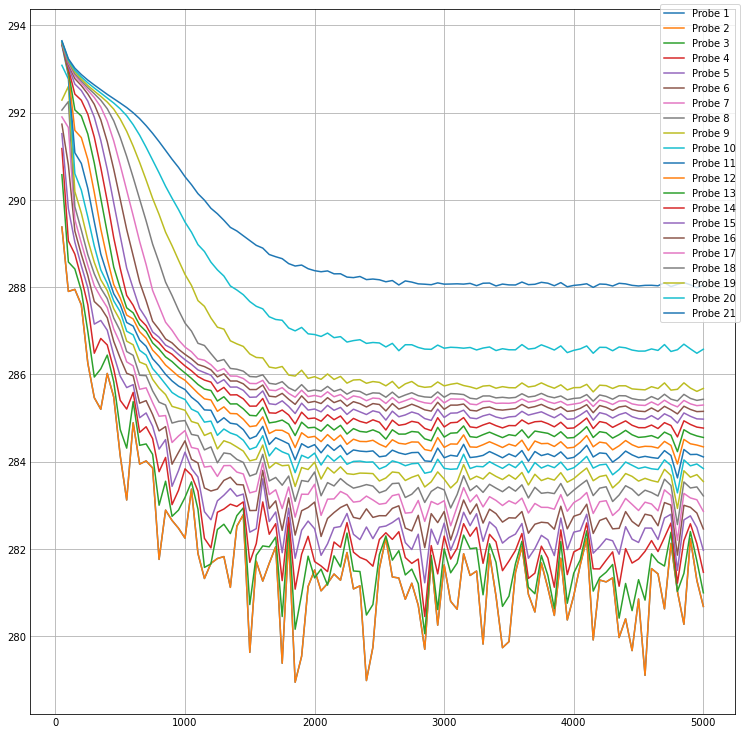

In [128]:
fig, ax = plt.subplots(figsize=(10,10))

ax = plt.plot(VP_0.iloc[:, 0], VP_0.iloc[:, 1:] )
fig.legend(c_list[1:])

fig.show()

C:\Users\ferra\AppData\Local\Temp/ipykernel_14668/513445331.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


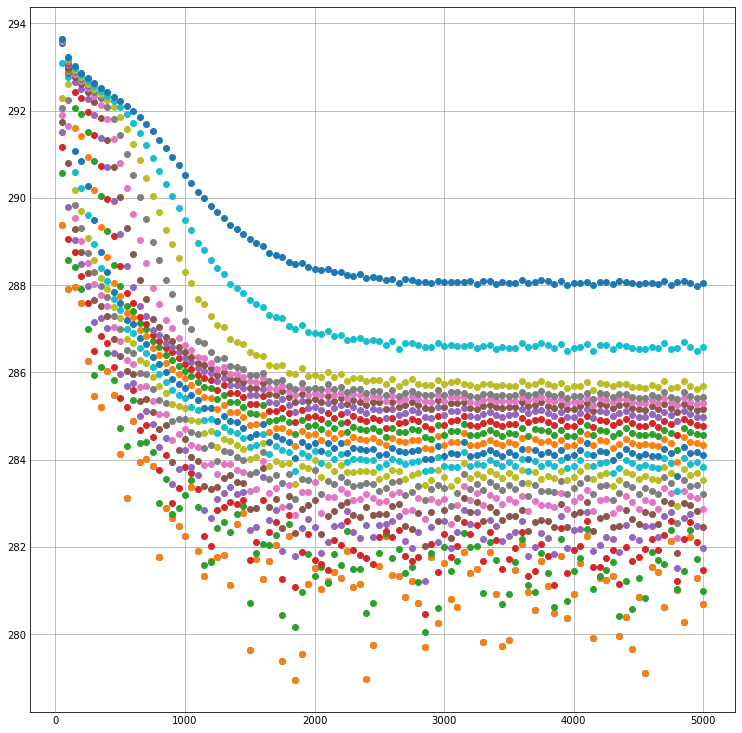

In [129]:
fig, ax = plt.subplots(figsize=(10,10))

for col in c_list[1:]:
    ax = plt.scatter(VP_0.iloc[:, 0], VP_0[col] )
fig.show()

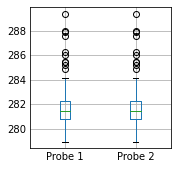

In [130]:
boxplot = VP_0.boxplot(['Probe 1', 'Probe 2'])



In [131]:
VP_temp = VP_0.drop('Time', axis=1)

In [132]:
VP_temp

,Probe 1,Probe 2,Probe 3,Probe 4,Probe 5,Probe 6,Probe 7,Probe 8,Probe 9,Probe 10,...,Probe 12,Probe 13,Probe 14,Probe 15,Probe 16,Probe 17,Probe 18,Probe 19,Probe 20,Probe 21
0,289.376111,289.376111,290.575118,291.174581,291.515100,291.733607,291.898818,292.056090,292.284635,293.081948,...,293.589032,293.584915,293.581635,293.583390,293.588737,293.595974,293.605148,293.611802,293.629430,293.644078
1,287.901449,287.901449,288.575860,289.058297,289.797472,290.798329,291.656605,292.250442,292.598401,292.769993,...,292.904840,292.953306,293.004116,293.054238,293.098271,293.133411,293.160647,293.188356,293.206350,293.231139
2,287.948612,287.948612,288.415667,288.755772,289.031504,289.284695,289.547629,289.842949,290.188918,290.600484,...,291.590653,292.061341,292.422399,292.651971,292.776545,292.842487,292.886851,292.932896,292.970032,293.016734
3,287.592819,287.592819,287.918203,288.210424,288.489569,288.749405,289.007951,289.305117,289.695596,290.221731,...,291.425171,291.919330,292.281324,292.504363,292.618280,292.677838,292.722651,292.768211,292.816206,292.870071
4,286.258222,286.258222,286.987976,287.594413,287.985362,288.266699,288.499115,288.742149,289.081378,289.603776,...,290.925270,291.507675,291.960919,292.261082,292.425151,292.510575,292.569019,292.619213,292.680676,292.743178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,281.025624,281.025624,281.029778,281.216461,281.511131,281.859219,282.201623,282.559461,282.929516,283.285842,...,283.946968,284.230365,284.568295,284.885343,285.094819,285.256668,285.393427,285.658707,286.565653,288.063713
96,280.274595,280.274595,281.441081,282.191191,282.666607,283.001420,283.274046,283.535529,283.792279,284.041241,...,284.510920,284.732459,284.936955,285.117296,285.270841,285.404000,285.542684,285.806831,286.692762,288.102639
97,282.234974,282.234974,282.398670,282.577515,282.759164,282.954830,283.170102,283.397890,283.644723,283.905407,...,284.410728,284.642299,284.853669,285.040852,285.197568,285.326320,285.450449,285.687292,286.585022,288.052292
98,281.280343,281.280343,281.726138,282.122516,282.491944,282.823437,283.127568,283.422207,283.703699,283.947818,...,284.381430,284.590013,284.792321,284.981639,285.147491,285.284134,285.404786,285.611075,286.484717,287.986741


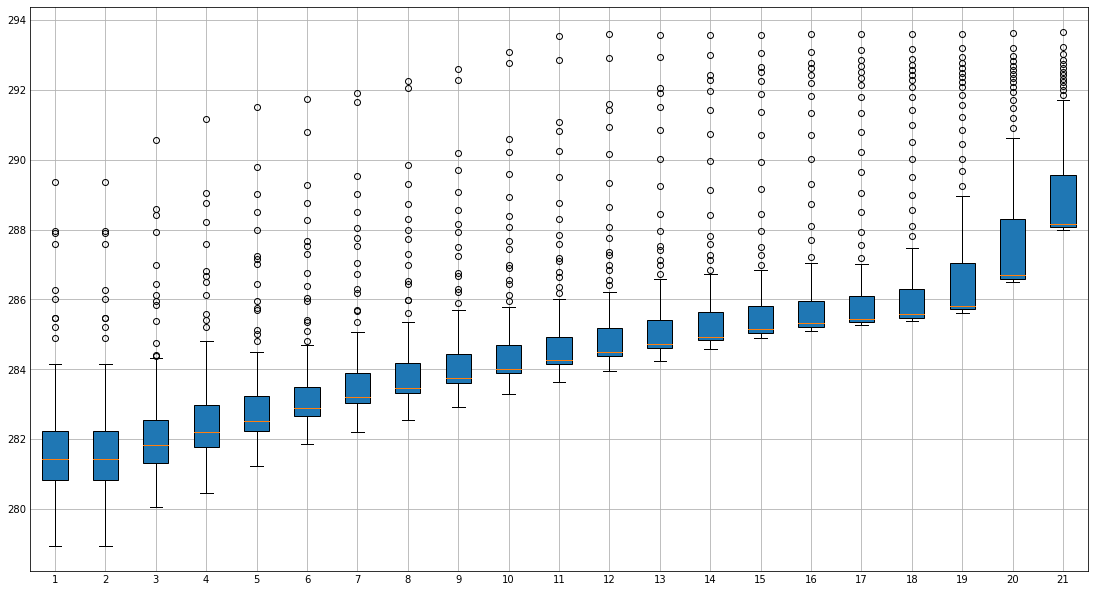

In [137]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot(VP_temp, patch_artist=True)
#ax.set_xticklabels(labels =c_list[1:],  rotation=90)
#plt.xticks(rotation=45)
plt.show()